In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sat Apr 25 22:26:08 2020

@author: KAUSTAV CHANDA
"""


import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib.pyplot as plt
%matplotlib inline



![image.png](img2.png)

![image.png](img1.png)

#### Forward Computation (Vectorized Equations) :



$$ Z^l = (W^l)^T . a^{l-1} + b^l$$
Here $ a^0 = X^T ; a^l = \sigma '(Z^l) $


Loss for $ X_n$ $$ Loss_n = \frac{1}{2} \sum_{k=1}^C (y_k - a_k^L)^2$$  

#### Backprogation (Vectorized Equations) :
$$\delta^ l = W^{l+1} . \delta^{l+1} \oplus \sigma'(Z^{l}) $$ where $ \delta^ l = \frac{\delta Loss}{\delta Z^{l}}$ and $\oplus $ denotes elementwise multiplication 


$$ \delta^L = (a^{L} - y^{L}) \oplus \sigma'(Z^{L})$$ where $L$ is the last layer


$$ \frac{ \delta Loss}{\delta b^l} = \delta^l$$


$$ \frac{\delta Loss}{\delta W^l} = a^{l-1} . (\delta ^l)^T $$



![image.png](img3.png)

In [1]:


def dsigmoid(x):
    return np.exp(x)/ (1.0 + np.exp(x))**2

def sigmoid(x):
    return 1.0/ (1.0 + np.exp(-x))   
    
class MLP:
    def __init__(self):
        self.W = [None]
        self.A = [None]
        self.Z = [None]
        self.b = [None]
        self.layers = 0
        self.i_nodes = 0
        
    def add_input_layer(self,n_nodes):
        self.A[0] = np.empty(n_nodes,dtype=object)
        self.i_nodes = n_nodes
        
    def add_layer(self,n_nodes):
        if(self.layers == 0 ):
            self.W.append(np.random.randn(self.i_nodes,n_nodes))
        else:
            self.W.append(np.random.randn(self.W[self.layers].shape[1],n_nodes))
        self.b.append(np.zeros((n_nodes, 1)))
        self.layers += 1
        
    def forward(self,X):
        
        self.A = [None]
        self.Z = [None]
        
        self.A[0] = X
        L = self.layers
        for l in range(1,L+1): # 1 tp L
            self.Z.append(np.dot(self.W[l].T,self.A[l-1]) + self.b[l])  #Z[l] created
            self.A.append(sigmoid(self.Z[l]))                   #A[l] created 
            
    def back_prop(self,X,Y):
         self.A[0] = X
         L = self.layers
         m = X.shape[1]
         self.dZ = [None for _ in range(L+1)]
         self.dW = [None for _ in range(L+1)]
         self.db = [None for _ in range(L+1)]
         
         self.dZ[L] = np.multiply((self.A[L] - Y),dsigmoid(self.Z[L])) 
         self.dW[L] = (1/m) * np.dot(self.A[L-1],self.dZ[L].T)
         self.db[L] = (1/m) * np.sum(self.dZ[L], axis=1, keepdims=True)
         
         for l in range(L-1,0,-1):
             self.dZ[l] = np.multiply(np.dot(self.W[l+1],self.dZ[l+1]),
                                                    dsigmoid(self.Z[l])) 
             self.dW[l] = (1/m) * np.dot(self.A[l-1],self.dZ[l].T)
             self.db[l] = (1/m) * np.sum(self.dZ[l], axis=1, keepdims=True)
             
    def train(self, X, Y, epochs=10000, learning_rate=1.2):
        """ Complete process of learning, alternates forward pass,
            backward pass and parameters update """
        self.losses = []
        m = X.shape[0]
        for e in range(epochs):
            L = self.layers
            self.forward(X.T)
            loss = np.sum((Y.T - self.A[L])**2)/ m
            self.back_prop(X.T, Y.T)
            self.losses.append(loss)
            
            for l in range(1,L+1):
                self.W[l] -= learning_rate * self.dW[l]
                self.b[l] -= learning_rate * self.db[l]
            if e % 1000 == 0:
                print("Loss ",  e+1, " = ", loss)
        
         



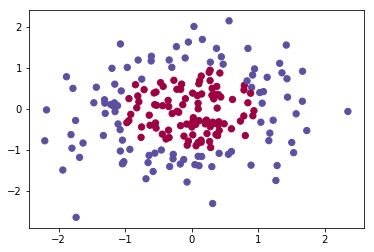

In [2]:
def load_data():
    N = 200
    gq = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.7,
                                                  n_samples=N, n_features=2,
                                                  n_classes=2, shuffle=True,
                                                  random_state=None)
    return gq

gaussian_quantiles = load_data()
X, Y = gaussian_quantiles



# Input Data
plt.figure("Input Data")
plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral)
plt.show()

Y = Y.reshape(len(Y),1)

Loss  1  =  0.2821436383866696
Loss  1001  =  0.08354758801583204
Loss  2001  =  0.044802048060832295
Loss  3001  =  0.03384790256357215
Loss  4001  =  0.027841138365072585
Loss  5001  =  0.023870472071947608
Loss  6001  =  0.021229182607213352
Loss  7001  =  0.019404020229969968
Loss  8001  =  0.018059401849281797
Loss  9001  =  0.017014264414995702


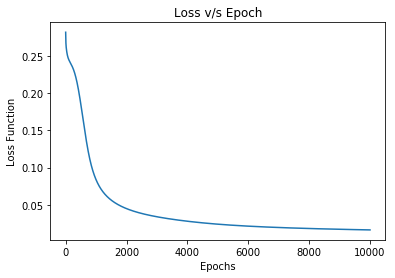

In [3]:
nn = MLP()
nn.add_input_layer(X.shape[1])
nn.add_layer(4)
nn.add_layer(Y.shape[1])

nn.train(X, Y)


plt.plot(range(len(nn.losses)),nn.losses)
plt.xlabel("Epochs")
plt.ylabel("Loss Function")
plt.title("Loss v/s Epoch")
plt.show()